# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [45]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.add("Plots")
Pkg.add("LaTeXStrings")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Roots")
Pkg.instantiate()

  Activating project at `/home2/ajv85/hw2-alex-van-den-hende`
   Resolving package versions...
  No Changes to `/home2/ajv85/hw2-alex-van-den-hende/Project.toml`
  No Changes to `/home2/ajv85/hw2-alex-van-den-hende/Manifest.toml`
   Resolving package versions...
  No Changes to `/home2/ajv85/hw2-alex-van-den-hende/Project.toml`
  No Changes to `/home2/ajv85/hw2-alex-van-den-hende/Manifest.toml`
   Resolving package versions...
  No Changes to `/home2/ajv85/hw2-alex-van-den-hende/Project.toml`
  No Changes to `/home2/ajv85/hw2-alex-van-den-hende/Manifest.toml`
   Resolving package versions...
  No Changes to `/home2/ajv85/hw2-alex-van-den-hende/Project.toml`
  No Changes to `/home2/ajv85/hw2-alex-van-den-hende/Manifest.toml`
   Resolving package versions...
  No Changes to `/home2/ajv85/hw2-alex-van-den-hende/Project.toml`
  No Changes to `/home2/ajv85/hw2-alex-van-den-hende/Manifest.toml`


In [46]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
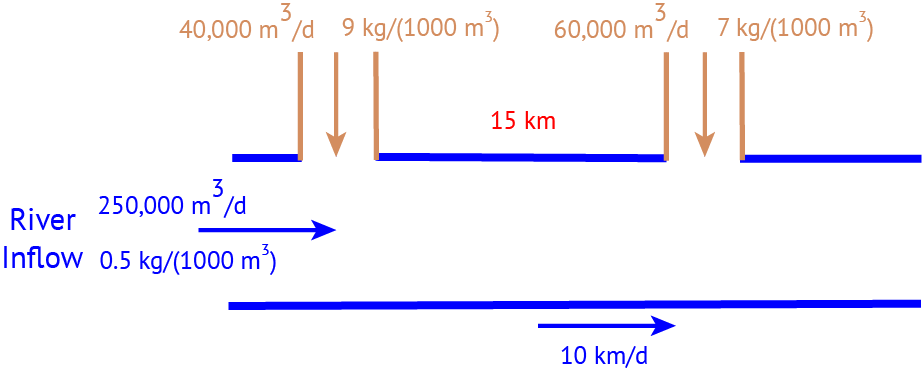
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 m$^3$).

> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

#### Solution
Differential equation solution modeling the CRUD concentration for the first 15km:<br>
$\frac{dX}{dt}=-kX$<br>
$X=X_{i1}e^{-kt}=X_{i1}e^{-kd/v}$<br><br>
$X_{i1}=\frac{Q_rX_r+Q_1X_1}{Q_r+Q_1}=\frac{125,000+360,000}{290,000}=1.6724\;kg/(1000\;m^3)$<br>
$X(15km)=1.6724e^{-0.36*15/10}=0.975\;kg/(1000\;m^3)$<br><br>

Differential equation solution modeling the CRUD concentration downstream after the first 15km:<br>
$\frac{dX}{dt}=-kX$<br>
$X=X_{i2}e^{-kt}=X_{i2}e^{-kd/v}$<br><br>
$X_{i2}=\frac{(Q_r+Q_1)X(15km)+Q_2X_2}{Q_r+Q_1+Q_2}=\frac{282,632.9+420,000}{350,000}=2.008\;kg/(1000\;m^3)$<br>
$X(d)=2.008e^{(-0.36/10)d}$<br>
d = distance downstream of second discharge<br><br><br>

$$
X(d) = 
\left\{
\begin{array}{ll}
      1.672e^{(-0.36/10)d} & 0\leq d<15 \\
      2.008e^{(-0.36/10)d} & 15\leq d \\
\end{array} 
\right.
$$
<center>for d = distance downstream of initial discharge point in km<br>
<center>where X(d) = CRUD concentration at distance d in kg/1000 m3<br><br>

Given that the maximum contamination levels of each section (first 15km and downstream) of the river are 1.672 and 2.008 kg/1000m3 of CRUD respectively, the system IS always in compliance with a regulatory limit of 2.5 kg/1000m3.

### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

#### Solution
Functions are produced for the change in x relative to recycling, outflow, and point source release. These functions are then combined to represent the total change in x over 1 time step. Finally, a range of initial values (0-3 at 0.25 intervals) were taken, solved for, and utilized to inform equilibria calculations.

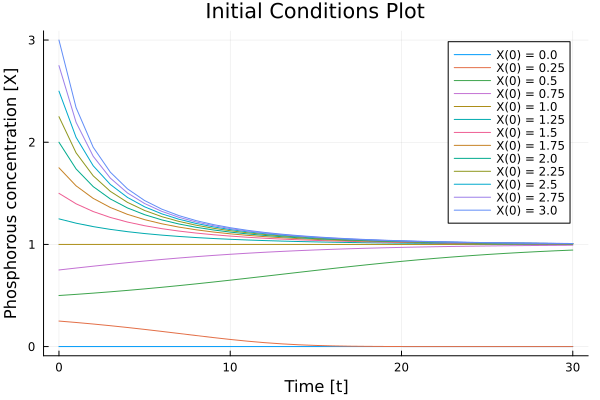

The first equilibria occurs at 0.0
The second equilibria occurs at 1.0

In [86]:
# Three functions that describe the total change in x over 1 time step due to recycling, outflow, and point source release.
function X_recycling(x, q)
    return (x^q) / (1 + x^q)
end

function X_outflow(x, b)
    return -1*b*x
end

function fX(x, a, b, q)
    return x + a + X_recycling(x, q) + X_outflow(x, b)
end

# Given values for a, b, q
a = 0
b = 0.5
q = 1.5

# Iterate phosphorous concentration change across 13 initial values (0, 0.25, ..., 3)
labels = []
T = 0:30
X = zeros(31, 13)
for n in 1:13
    push!(labels, "X(0) = " * string((n-1)/4))
    X[1,n] = (n-1)/4
    for t in 1:30
        X[t+1, n] = fX(X[t, n], a, b, q)
    end
end

# Plot these 13 concentration changes to visualize concentration equilbrium
p1 = plot(T, X, title = "Initial Conditions Plot", label = permutedims(labels))
xlabel!("Time [t]")
ylabel!("Phosphorous concentration [X]")
display(p1)

# Utulize roots to solve for exact equilibriums
equilibria1 = Roots.find_zero(x -> a + X_recycling(x, q) + X_outflow(x, b), 0)
equilibria2 = Roots.find_zero(x -> a + X_recycling(x, q) + X_outflow(x, b), 1)

print("The first equilibria occurs at ", equilibria1, "\nThe second equilibria occurs at ", equilibria2)

The system is highly reslient where almost any initial condition yields an equilibria of X = 1, and a very small domain of initial values near X = 0 yield a second equilibria of X = 0.

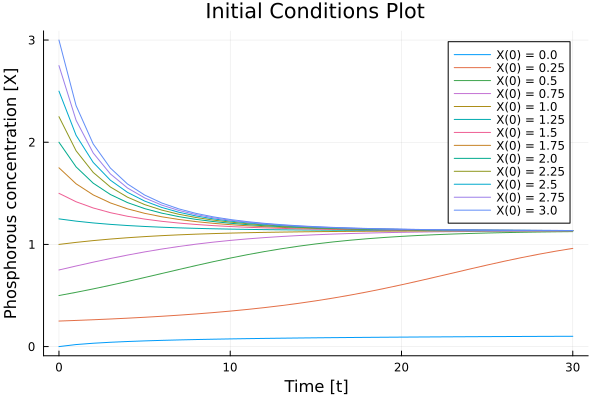

The first equilibria occurs at 0.1162444196607475
The second equilibria occurs at 1.1341008852434813

In [87]:
# Given values for a, b, q
a = 0.02
b = 0.5
q = 1.5

# Iterate phosphorous concentration change across 13 initial values (0, 0.25, ..., 3)
labels = []
T = 0:30
X = zeros(31, 13)
for n in 1:13
    push!(labels, "X(0) = " * string((n-1)/4))
    X[1,n] = (n-1)/4
    for t in 1:30
        X[t+1, n] = fX(X[t, n], a, b, q)
    end
end

# Plot these 13 concentration changes to visualize concentration equilbrium
p2 = plot(T, X, title = "Initial Conditions Plot", label = permutedims(labels), show = true)
xlabel!("Time [t]")
ylabel!("Phosphorous concentration [X]")
display(p2)

# Utulize roots to solve for exact equilibriums
equilibria1 = Roots.find_zero(x -> a + X_recycling(x, q) + X_outflow(x, b), 0)
equilibria2 = Roots.find_zero(x -> a + X_recycling(x, q) + X_outflow(x, b), 1)

print("The first equilibria occurs at ", equilibria1, "\nThe second equilibria occurs at ", equilibria2)

The system is highly reslient where almost any initial condition yields an equilibria of X = 1.134, and a very small domain of initial values near X = 0 yield a second equilibria of X = 0.116.

### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

Consider the lake eutrophication example from [Lecture
04](https://viveks.me/environmental-systems-analysis/slides/lecture03-1-eutrophication-modeling.html#/title-slide).
Suppose that phosphorous is also atmospherically deposited onto the lake
surface at a rate of
$1.6 \times 10^{-4} \mathrm{kg/(yr} \cdot \mathrm{m}^2)$, which is then
instantly mixed into the lake. Derive a model for the lake phosphorous
concentration and find the maximum allowable point source phosphorous
loading if the goal is to keep lake concentrations below 0.02 mg/L.

## References

List any external references consulted, including classmates.